# We alternate between x and y (axis 0 and 1) at each level.

Depth = 0 → Split by x-axis (axis=0)
Sort points by x:
→ [(2, 7), (3, 6), (6, 12), (9, 1), (10, 19), (13, 15), (17, 15)]
Median is (9, 1)

Depth = 1 → Left: split by y-axis (axis=1)
Left of (9,1): [(2,7), (3,6), (6,12)] → sort by y → median = (3,6)
Right of (9,1): [(10,19), (13,15), (17,15)] → sort by y → median = (13,15)

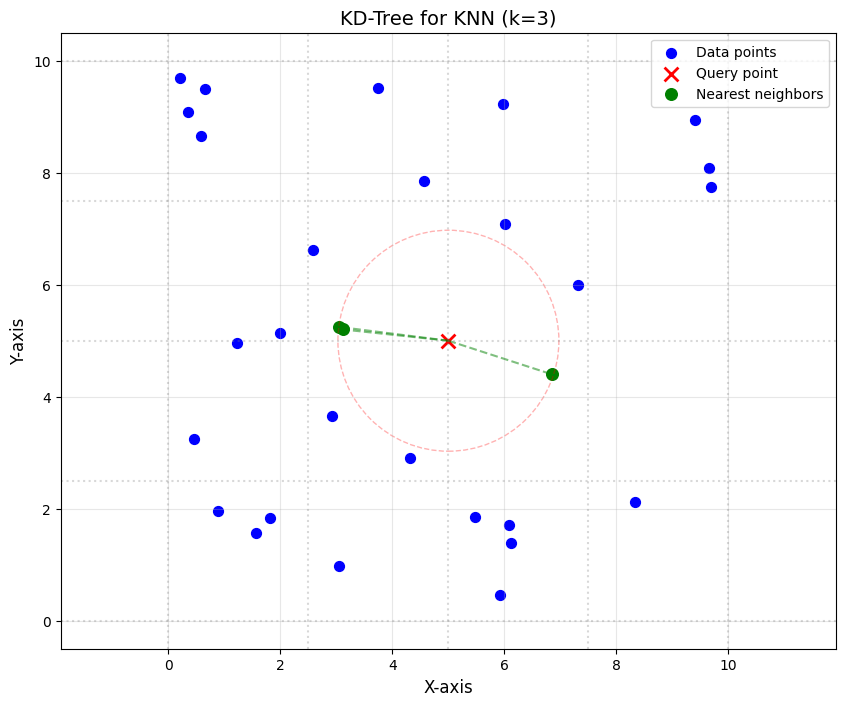

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.neighbors import KDTree

# Generate random 2D data
np.random.seed(42)
data = np.random.rand(30, 2) * 10

# Create a query point
query_point = np.array([[5, 5]])

# Build KD-Tree
tree = KDTree(data, leaf_size=2)

# Find 3 nearest neighbors
distances, indices = tree.query(query_point, k=3)
neighbors = data[indices[0]]

# Visualization
plt.figure(figsize=(10, 8))

# Plot all points
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data points', s=50)
plt.scatter(query_point[:, 0], query_point[:, 1], c='red', marker='x', label='Query point', s=100, linewidths=2)

# Highlight nearest neighbors
plt.scatter(neighbors[:, 0], neighbors[:, 1], c='green', label='Nearest neighbors', s=70)

# Draw lines to neighbors
for neighbor in neighbors:
    plt.plot([query_point[0, 0], neighbor[0]], [query_point[0, 1], neighbor[1]], 
             'g--', alpha=0.5)

# Draw search radius (distance to farthest neighbor)
radius = distances[0][-1]
circle = plt.Circle((query_point[0, 0], query_point[0, 1]), radius, 
                    color='r', fill=False, linestyle='--', alpha=0.3)
plt.gca().add_patch(circle)

# Add KD-Tree partition lines (simplified)
for x in np.linspace(0, 10, 5):
    plt.axvline(x, color='gray', linestyle=':', alpha=0.3)
for y in np.linspace(0, 10, 5):
    plt.axhline(y, color='gray', linestyle=':', alpha=0.3)

plt.title('KD-Tree for KNN (k=3)', fontsize=14)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()